### Tanmay Bhatt
### 011499072
CMPE 258 <br />
Assignmnt - 3 <br />
Date: 03/11/2018 <br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import uniform, seed

## 1. (40pts) Define functions
Please define the following functions.
One-hot encoding
Sigmoid
Forward propagation
Backward propagation
Gradient descent
Softmax

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def sigmoid_derivative(a):
    return a * (1-a)

In [4]:
def softmax(z):
    ez = np.exp(z)
    return (ez/np.sum(ez,axis=1).reshape(-1,1))

In [5]:
def forward_pass(X_mat):
    
    global neural_dict
    W1 = neural_dict['W1']
    W2 = neural_dict['W2']
    B1 = neural_dict['B1']
    B2 = neural_dict['B2']
    
    z1 = np.dot(X_mat,W1.T).T + B1
    a1 = sigmoid(z1)
    z2 = (np.dot(W2, a1)+ B2)
    a2 = sigmoid(z2).T
    neural_dict['a1'] = a1
    neural_dict['a2'] = a2

In [6]:
def one_hot_encoding(mat):
    list_of_list = []
    for i in range(0,len(mat)):
        small_list = np.zeros(np.max(mat)+1)
        small_list[mat[i]] = 1
        list_of_list.append(small_list)
    result = np.array(list_of_list)
    return result

In [7]:
def backward_pass():
    m = X_train.shape[0]
    y = Y_train_onehot
    W1 = neural_dict['W1']
    W2 = neural_dict['W2']
    B1 = neural_dict['B1']
    B2 = neural_dict['B2']
    a1 = neural_dict['a1']
    a2 = neural_dict['a2']

    dl_dz2 = a2-y
    dl_dw2 = np.dot(dl_dz2.T, a1.T)/m
    dl_db2 = np.sum(dl_dz2.T, axis=1, keepdims=True)/m
    dl_da1 = np.dot(dl_dz2, W2)
    dl_dz1 = np.multiply(dl_da1.T,sigmoid_derivative(a1))
    dl_dw1 = np.dot(dl_dz1, X_train)/m
    dl_db1 = np.sum(dl_dz1, axis=1, keepdims=True)/m
    
    return dl_dw1, dl_dw2, dl_db1, dl_db2

In [8]:
def calculate_loss():
    a = neural_dict['a2']
    y = Y_train_onehot
    return (np.multiply(y,np.log(a)) + np.multiply((1-y),np.log(1-a)))

In [9]:
def calculate_cost():
    m = X_train.shape[0]
    cost = -np.sum(calculate_loss())
    return cost/m

In [10]:
def gradient_descent(X_train,learning_rate,iterations=1000):
   
    global plot_object
    global neural_dict
    
    neural_dict['W1'] = W1
    neural_dict['W2'] = W2
    neural_dict['B1'] = B1
    neural_dict['B2'] = B2

    all_costs = []
    count = 0
    forward_pass(X_train)
    new_cost = calculate_cost()
    current_cost = float("inf")
    while new_cost <= current_cost and count < iterations:
        all_costs.append(new_cost)
        count += 1        
        dl_dw1, dl_dw2, dl_db1, dl_db2 = backward_pass()
        
        
        neural_dict['W1'] = neural_dict['W1'] - (learning_rate * dl_dw1)
        neural_dict['W2'] = neural_dict['W2'] - (learning_rate * dl_dw2)
        neural_dict['B1'] = neural_dict['B1'] - (learning_rate * dl_db1)
        neural_dict['B2'] = neural_dict['B2'] - (learning_rate * dl_db2)
        
        current_cost = new_cost
        forward_pass(X_train)
        new_cost = calculate_cost()
        count +=1
    plot_object[learning_rate] = all_costs
    print "Final cost : ",
    print new_cost
    print "Iternations : %d" % count

In [11]:
"""
Predicting results by performing Softmax on the result of forward pass on the testing data
"""

def predict(X_mat):
    global neural_dict
    
    W1 = neural_dict['W1']
    W2 = neural_dict['W2']
    B1 = neural_dict['B1']
    B2 = neural_dict['B2']
    
    z1 = np.dot(X_mat,W1.T).T + B1
    a1 = sigmoid(z1)
    z2 = (np.dot(W2, a1)+ B2)
    a2 = softmax(z2).T
    prediction = []
    for i in a2:
        prediction.append(np.argmax(i))
    return prediction

In [12]:
def calculate_accuracy(actual,predicted):
    count = 0.0
    for i in range(0,len(actual)):
        if predicted[i] == actual[i]:
            count+= 1
    return count/len(actual)

In [13]:
plot_object = {}

## 2. (5pts) Split data
Please split each data (Train & Test) set as input (x) and output (y) set.
Input set is the columns starting 0 to 399.
Output set is the column of ‘y’.

In [14]:
train_data = pd.read_csv("./ex3_train.csv")
test_data = pd.read_csv("./ex3_test.csv")

X_train = train_data.iloc[:,:(train_data.shape[1] -1 )]
X_test =  test_data.iloc[:,:(test_data.shape[1] -1 )]

Y_train = train_data['y']
Y_test =test_data['y']
Y_train_onehot = one_hot_encoding(Y_train)
Y_test_onehot = one_hot_encoding(Y_test)

Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

## 3. (5pts) Initialize parameters
Please use np.random.seed(1) when weight coefficients is initialized.
Please set as zeros for bias terms.

In [15]:
hidden_neurons = 25
output_neurons = 10
np.random.seed(1)

W1 = []
for i in range(0,hidden_neurons):
    sampl = np.random.uniform(low=-1, high=1, size=(X_train.shape[1]))
    W1.append(sampl)
W2 = []
for i in range(0,output_neurons):
    sampl = np.random.uniform(low=-1, high=1, size=(hidden_neurons))
    W2.append(sampl)
B1 = []
for i in range(0,hidden_neurons):
    B1.append([0])
B2 = []
for i in range(0,output_neurons):
    B2.append([0])
    
W1 = np.array(W1)
W2 = np.array(W2)
B1 = np.array(B1)
B2 = np.array(B2)

## 4. (20pts) Neural Network model with 1 hidden layer
Please build neural network model using input layer (400 neurons), 1 hidden layer (25 neurons), and output layer (10
neurons) using training data set.

In [16]:
neural_dict = {}

In [17]:
learning_rates = [0.01,0.1,0.5,0.7,1]
plot_object = {}
for rate in learning_rates:
    gradient_descent(X_train,rate,500)
    Y_pred = np.array(np.argmax(neural_dict['a2'], axis=1))
    print "Learning rate : %f" % rate
    print "Training accuracy : %f " % calculate_accuracy(Y_train,Y_pred)
    print
    print "************"
    print

Final cost :  3.32102945016
Iternations : 500
Learning rate : 0.010000
Training accuracy : 0.140857 

************

Final cost :  2.18525907906
Iternations : 500
Learning rate : 0.100000
Training accuracy : 0.619429 

************

Final cost :  1.09508005459
Iternations : 500
Learning rate : 0.500000
Training accuracy : 0.836857 

************

Final cost :  0.917439042255
Iternations : 500
Learning rate : 0.700000
Training accuracy : 0.866000 

************

Final cost :  0.766041218141
Iternations : 500
Learning rate : 1.000000
Training accuracy : 0.897143 

************



## 5. (10pts) Predictions
Please predict digit using softmax function.
Please calculate accuracy for the prediction using training data set and testing data set.

In [18]:
'''Would take about 2 Minutes'''

gradient_descent(X_train,1,8000)
Y_pred_train = np.array(np.argmax(neural_dict['a2'], axis=1))
Y_pred_test = predict(X_test)
print "Training accuracy : %f " % calculate_accuracy(Y_train,Y_pred_train)
print "Testing accuracy : %f " % calculate_accuracy(Y_test,Y_pred_test)

Final cost :  0.107004221111
Iternations : 8000
Training accuracy : 0.993429 
Testing accuracy : 0.910667 


## 6. (20pts) Optimization
Please optimize your model using various learning rate and number of iteration.
Please plot cost versus number of iteration with different learning rate for training data set.
Please print out the optimized accuracy for testing data set.

In [19]:
learning_rates = [0.01,2,1]
plot_object = {}
# iterations = [500,700,1000,5000]
train_results = []
test_results = []
for rate in learning_rates:
#     for it in iterations:
    gradient_descent(X_train,rate,1000)   #,it)
    Y_pred_train = np.array(np.argmax(neural_dict['a2'], axis=1))
    Y_pred_test = predict(X_test)
    train_results.append(calculate_accuracy(Y_train,Y_pred_train))
    test_results.append(calculate_accuracy(Y_test,Y_pred_test))
    print "Learning rate : %f" % rate
    print "Training accuracy : %f " % train_results[-1]
    print "Testing accuracy : %f " % test_results[-1]
    print
    print "************"
    print

Final cost :  3.11273973701
Iternations : 1000
Learning rate : 0.010000
Training accuracy : 0.215143 
Testing accuracy : 0.220000 

************

Final cost :  0.354720557248
Iternations : 1000
Learning rate : 2.000000
Training accuracy : 0.955143 
Testing accuracy : 0.907333 

************

Final cost :  0.529825934313
Iternations : 1000
Learning rate : 1.000000
Training accuracy : 0.934000 
Testing accuracy : 0.896667 

************



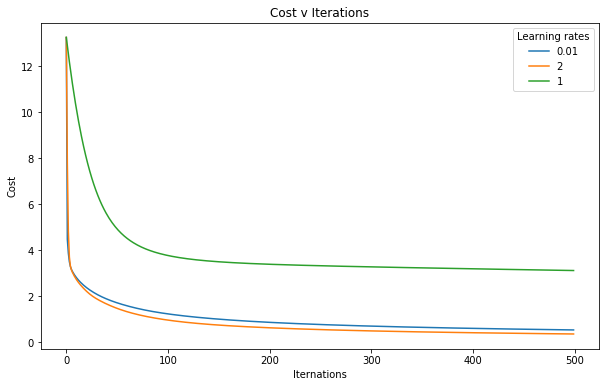

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel('Iternations')
plt.ylabel('Cost')
plt.title("Cost v Iterations")
for key, value in plot_object.items():
    plt.plot(range(0,len(value)),sorted(value,reverse=True),label='Learning rate' + str(key))
plt.legend(learning_rates,title="Learning rates")

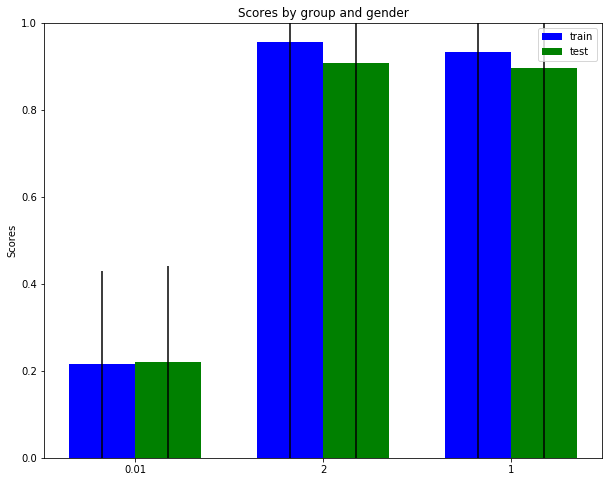

In [21]:
N = len(learning_rates)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(ind, train_results, width, color='b', yerr=train_results)

rects2 = ax.bar(ind + width, test_results, width, color='g', yerr=test_results)


fig.set_figheight(8)
fig.set_figwidth(10)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((learning_rates))
ax.set_ylim([0,1])

ax.legend((rects1[0], rects2[0]), ('train', 'test'))

plt.show()

### Best accuracy achieved with rate 1 and Iterations 8000

Final cost :  0.107004221111 <br />
Iternations : 8000<br />
Learning rate : 1<br />
Training accuracy : 0.993429<br /> 
Testing accuracy : 0.910667 <br />

### Quick second Best accuracy achieved with rate 2 and Iterations 1200
Final cost :  0.3136009954 <br />
Iternations : 1200 <br />
Learning rate : 2<br />
Training accuracy : 0.961714  <br />
Testing accuracy : 0.908000 <br /> 